In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("dataset/synthetic_passenger_data.csv")

df

,Age,Fare,Sex,Embarked,Pclass,Survived
0,41.0,83.94,male,n,1,0
1,33.3,54.00,female,C,3,0
2,42.8,47.76,female,S,2,0
3,53.3,48.49,male,Q,3,0
4,32.2,17.82,male,S,1,0
...,...,...,...,...,...,...
195,39.6,5.06,female,S,2,0
196,24.4,5.00,male,S,3,1
197,36.8,41.90,male,S,1,0
198,NaN,54.82,male,Q,3,0


# EDA + ML Recap

In [7]:
# get info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       185 non-null    float64
 1   Fare      191 non-null    float64
 2   Sex       200 non-null    object 
 3   Embarked  200 non-null    object 
 4   Pclass    200 non-null    int64  
 5   Survived  200 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Age,Fare,Pclass,Survived
count,185.000000,191.000000,200.00000,200.000000
mean,34.332973,46.880209,2.34000,0.420000
std,10.962939,71.905342,0.81098,0.494797
min,3.600000,0.440000,1.00000,0.000000
25%,26.400000,12.075000,2.00000,0.000000
50%,35.100000,30.320000,3.00000,0.000000
75%,40.800000,56.460000,3.00000,1.000000
max,64.600000,579.000000,3.00000,1.000000


In [9]:
df.head()

,Age,Fare,Sex,Embarked,Pclass,Survived
0,41.0,83.94,male,n,1,0
1,33.3,54.00,female,C,3,0
2,42.8,47.76,female,S,2,0
3,53.3,48.49,male,Q,3,0
4,32.2,17.82,male,S,1,0


In [10]:
df.tail()

,Age,Fare,Sex,Embarked,Pclass,Survived
195,39.6,5.06,female,S,2,0
196,24.4,5.00,male,S,3,1
197,36.8,41.90,male,S,1,0
198,NaN,54.82,male,Q,3,0
199,NaN,35.02,female,S,3,1


In [12]:
df.dtypes

Age         float64
Fare        float64
Sex          object
Embarked     object
Pclass        int64
Survived      int64
dtype: object

# Basic EDA

In [11]:
df.isna

<bound method DataFrame.isna of       Age   Fare     Sex Embarked  Pclass  Survived
0    41.0  83.94    male        n       1         0
1    33.3  54.00  female        C       3         0
2    42.8  47.76  female        S       2         0
3    53.3  48.49    male        Q       3         0
4    32.2  17.82    male        S       1         0
..    ...    ...     ...      ...     ...       ...
195  39.6   5.06  female        S       2         0
196  24.4   5.00    male        S       3         1
197  36.8  41.90    male        S       1         0
198   NaN  54.82    male        Q       3         0
199   NaN  35.02  female        S       3         1

[200 rows x 6 columns]>

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isnull().sum()

Age         15
Fare         9
Sex          0
Embarked     0
Pclass       0
Survived     0
dtype: int64

# Cheak the null value percentage

In [20]:
df.isnull().sum() / len(df) * 100

Age         7.5
Fare        4.5
Sex         0.0
Embarked    0.0
Pclass      0.0
Survived    0.0
dtype: float64

In [21]:
df['Age'].describe()

count    185.000000
mean      34.332973
std       10.962939
min        3.600000
25%       26.400000
50%       35.100000
75%       40.800000
max       64.600000
Name: Age, dtype: float64

In [23]:
df['Age'].median

<bound method Series.median of 0      41.0
1      33.3
2      42.8
3      53.3
4      32.2
       ... 
195    39.6
196    24.4
197    36.8
198     NaN
199     NaN
Name: Age, Length: 200, dtype: float64>

In [26]:
df['Age'].mod

<bound method Series.mod of 0      41.0
1      33.3
2      42.8
3      53.3
4      32.2
       ... 
195    39.6
196    24.4
197    36.8
198     NaN
199     NaN
Name: Age, Length: 200, dtype: float64>

In [29]:
df['Age'].value_counts().head(2)

Age
44.9    4
32.2    3
Name: count, dtype: int64

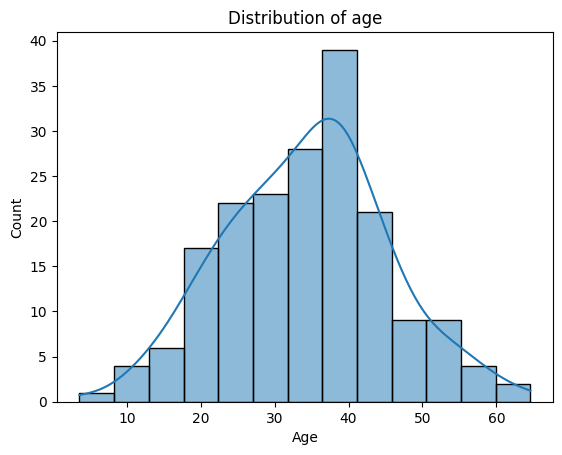

In [31]:
sns.histplot(df['Age'], kde=True)

plt.title('Distribution of age')

plt.show()

In [32]:
df['Age'].skew() # very few outliers (negligiable)

np.float64(0.029616359383541385)

In [34]:
df['Age'].kurt() # very few outliers (negligiable)

np.float64(-0.07677204354295553)

# we can choose ,eam as there are no significate outlier in age feature

In [35]:
df['Age'].fillna(df['Age'].mean()).inplace = True

In [37]:
df['Age'].isnull().sum()

np.int64(15)

In [42]:
df['Fare'].value_counts().sum()

np.int64(191)

In [43]:
df['Fare'].median()

np.float64(30.32)

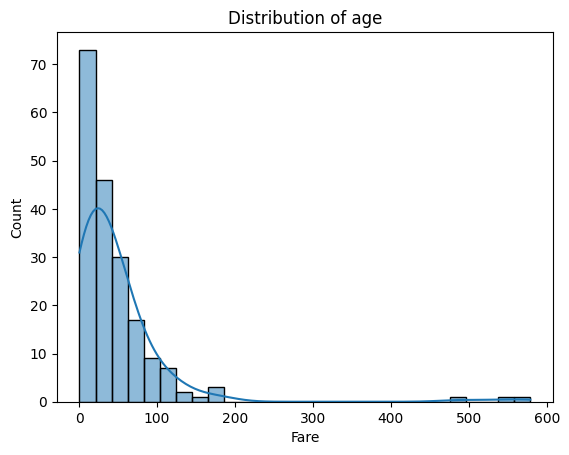

In [41]:
sns.histplot(df['Fare'], kde=True)

plt.title('Distribution of age')

plt.show()

In [46]:
q1 = 12
q3 = 56

iqr = q3-q1

lower = q1-(1.5*iqr)

upper = q3+(1.5*iqr)

print(lower, upper)

-54.0 122.0


In [47]:
df_test = df[(df['Fare'] >= 54) & (df['Fare']<=122)]

In [48]:
df_test['Fare'].describe()

count     45.000000
mean      76.442444
std       20.021765
min       54.000000
25%       60.050000
50%       67.380000
75%       90.350000
max      120.320000
Name: Fare, dtype: float64

In [ ]:
df_test['Fare'].fillna